# AN ANALYSIS OF ENERGY CONSUMPTION IN ALBERTA AND STRATEGIES FOR SUSTAINABLE ENERGY PRACTICES

# Group 5

# LINTA JOSE GEORGE
# GEORGE AGBAKPE
# KAMALPREET SINGH
# PRAJWAL NAGARAJ

In [7]:
# Import the necessary library and load the datasets
import pandas as pd

# Load generation data
generation_df = pd.read_csv("generation_data.csv")

# Load demand dataset
demand_df = pd.read_csv("demand_data.csv")

# List the first 5 rows in the dataset
demand_df.head(5)

,Date,Hourly Profile,Season,Date (MST),Region,Load
0,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Calgary,1028.338459
1,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Central,1326.524094
2,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Edmonton,1375.897642
3,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Losses,279.050196
4,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Northeast,907.567566


# Convert datatype to a format suitable for analysis and check the data types - Demand Dataset

In [8]:
# Convert 'Date' to datetime with the correct format
demand_df['Date'] = pd.to_datetime(demand_df['Date'], format='%d/%m/%Y')

# Convert 'Hourly Profile' to text (string)
demand_df['Hourly Profile'] = demand_df['Hourly Profile'].astype(str)

# Convert 'Season' to text (string)
demand_df['Season'] = demand_df['Season'].astype(str)

# Convert 'Date (MST)' to datetime
demand_df['Date (MST)'] = pd.to_datetime(demand_df['Date (MST)'], format='%d/%m/%Y %H:%M:%S')
# Convert 'Region' to text (string)
demand_df['Region'] = demand_df['Region'].astype(str)

# Convert 'Load' to float
demand_df['Load'] = demand_df['Load'].astype(float)

# Verify the changes
print(demand_df.dtypes)

Date              datetime64[ns]
Hourly Profile            object
Season                    object
Date (MST)        datetime64[ns]
Region                    object
Load                     float64
dtype: object


# Convert datatype to a format suitable for analysis and check the data types - Generation Dataset

In [9]:
# Convert 'Fuel Type' to string
generation_df['Fuel Type'] = generation_df['Fuel Type'].astype(str)

# Convert 'Date' to datetime with the correct format
generation_df['Date'] = pd.to_datetime(generation_df['Date'], format='%d/%m/%Y')

# Convert 'Date (MST)' to datetime with the correct format
generation_df['Date (MST)'] = pd.to_datetime(generation_df['Date (MST)'], format='%d/%m/%Y %H:%M:%S')

# Create a new DataFrame with the modified columns
generation_df = pd.DataFrame({
    'Fuel Type': generation_df['Fuel Type'],
    'Date': generation_df['Date'],
    'Date (MST)': generation_df['Date (MST)'],
    'Maximum Capacity': generation_df['Maximum Capacity'].astype(float),
    'System Available': generation_df['System Available'].astype(float),
    'System Capacity': generation_df['System Capacity'].astype(float),
    'System Generation': generation_df['System Generation'].astype(float)
})

# Display the updated Datatypes
print(generation_df.dtypes)

Fuel Type                    object
Date                 datetime64[ns]
Date (MST)           datetime64[ns]
Maximum Capacity            float64
System Available            float64
System Capacity             float64
System Generation           float64
dtype: object


# Check for missing data in each column in the Generation dataset

In [10]:
missing_data1 = generation_df.isnull().sum()

# Display the result
print(missing_data1)

# Check if there is any missing data in the entire DataFrame
any_missing_data1 = generation_df.isnull().any().any()

# Display the result
print(any_missing_data1)

Fuel Type            0
Date                 0
Date (MST)           0
Maximum Capacity     0
System Available     0
System Capacity      0
System Generation    0
dtype: int64
False


# Check for missing data in each column in the Demand dataset

In [11]:
missing_data2 = demand_df.isnull().sum()

# Display the result
print(missing_data2)

# Check if there is any missing data in the entire DataFrame
any_missing_data2 = demand_df.isnull().any().any()

# Display the result
print(any_missing_data2)

Date              0
Hourly Profile    0
Season            0
Date (MST)        0
Region            0
Load              0
dtype: int64
False


# Perform exploratory analysis on the generation dataset

In [12]:
# Summary statistics for numerical columns
generation_df.describe()

,Date,Date (MST),Maximum Capacity,System Available,System Capacity,System Generation
count,704018,704018,704018.000000,704018.000000,704018.000000,704018.000000
mean,2019-12-04 17:22:37.523245056,2019-12-05 04:52:37.640855040,1875.683478,1403.123887,1800.140009,779.673093
min,2015-01-01 00:00:00,2015-01-01 00:00:00,10.000000,0.000000,10.000000,0.000000
25%,2017-11-13 00:00:00,2017-11-13 15:00:00,540.000000,466.000000,540.000000,79.545381
50%,2020-02-21 00:00:00,2020-02-21 05:00:00,1138.000000,857.000000,1133.980000,353.919700
75%,2022-02-11 00:00:00,2022-02-11 09:00:00,2269.000000,1830.000000,2269.000000,1205.008347
max,2023-12-31 00:00:00,2023-12-31 23:00:00,6299.000000,6265.000000,6299.000000,5884.367269
std,NaN,NaN,1816.196768,1351.061091,1726.450802,1016.751687


# Perform exploratory analysis on the demand dataset

In [87]:
demand_df.describe()

,Date,Date (MST),Load
count,552216,552216,552216.000000
mean,2019-07-02 00:00:00.000000512,2019-07-02 11:30:00.000000256,1001.390987
min,2015-01-01 00:00:00,2015-01-01 00:00:00,-12.074965
25%,2017-04-01 00:00:00,2017-04-01 17:45:00,832.623760
50%,2019-07-02 00:00:00,2019-07-02 11:30:00,1007.087102
75%,2021-10-01 00:00:00,2021-10-01 05:15:00,1269.556364
max,2023-12-31 00:00:00,2023-12-31 23:00:00,2314.033850
std,NaN,NaN,405.671653


In [ ]:
# Data Analysis

In [ ]:
# Are there noticeable trends in energy consumption/demand over the years?

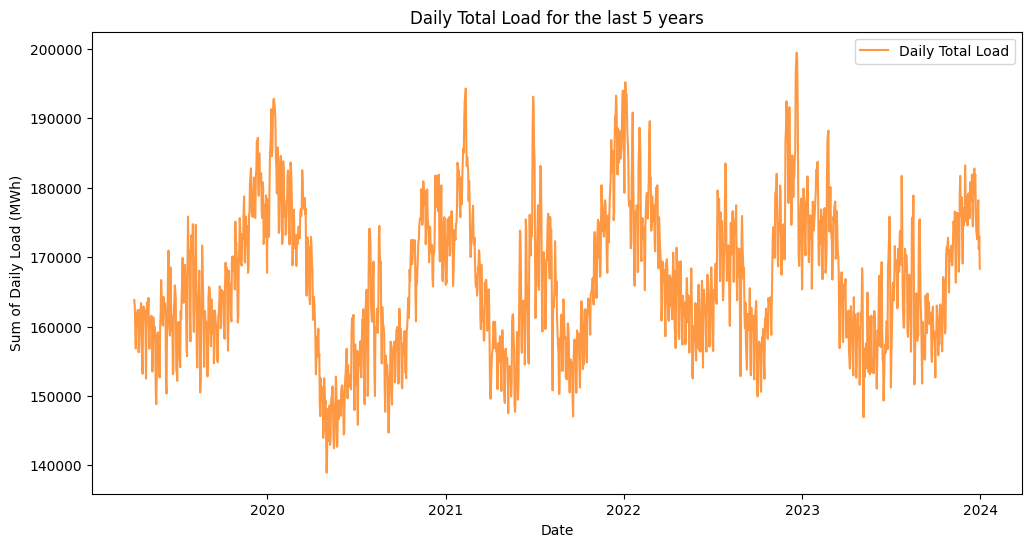

In [48]:
# Trends in energy consumption/demand over the last 5 years?
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 5 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=5)
df_last_5_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_5_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_5_years.groupby(df_last_5_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_5_years.groupby(generation_df_last_5_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load', color='#FF9843')
#plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Daily Total Load for the last 5 years')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Load (MWh)')
plt.legend()
plt.show()

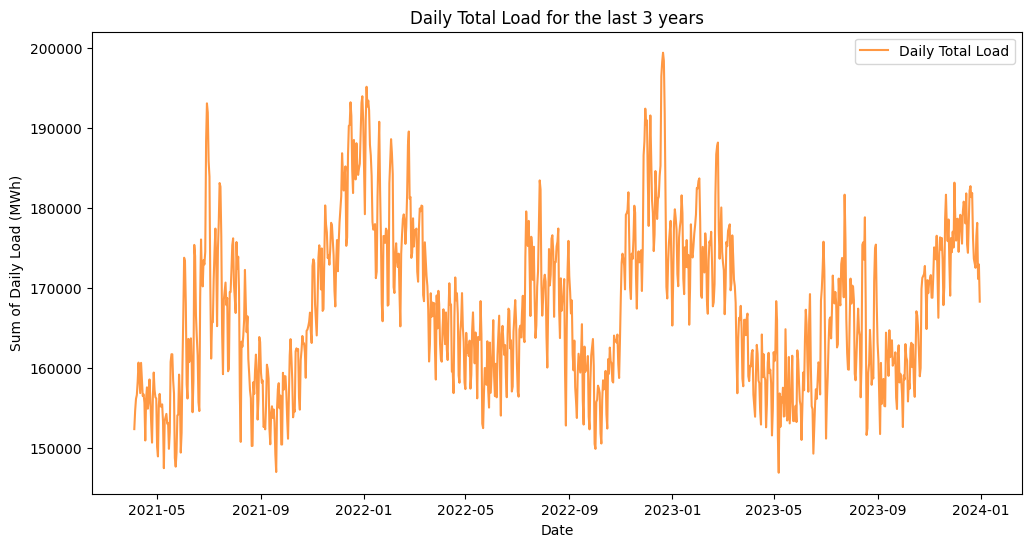

In [50]:
# Trends in energy consumption/demand over the last 3 years?
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 3 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
df_last_3_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_3_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_3_years.groupby(df_last_3_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_3_years.groupby(generation_df_last_3_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load', color='#FF9843')

plt.title('Daily Total Load for the last 3 years')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Load (MWh)')
plt.legend()
plt.show()

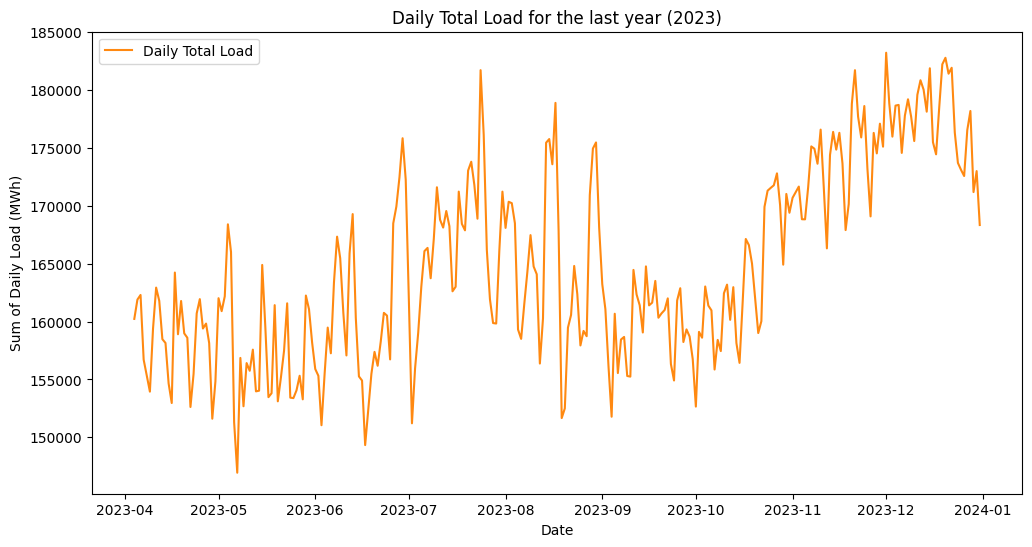

In [51]:
# Trends in energy consumption/demand over the last year (2023)
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year (2023)
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_1_year = demand_df[demand_df['Date'] >= start_date]
generation_df_last_1_year = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_1_year.groupby(df_last_1_year['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_1_year.groupby(generation_df_last_1_year['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load', color='#FF8911')

plt.title('Daily Total Load for the last year (2023)')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Load (MWh)')
plt.legend()
plt.show()

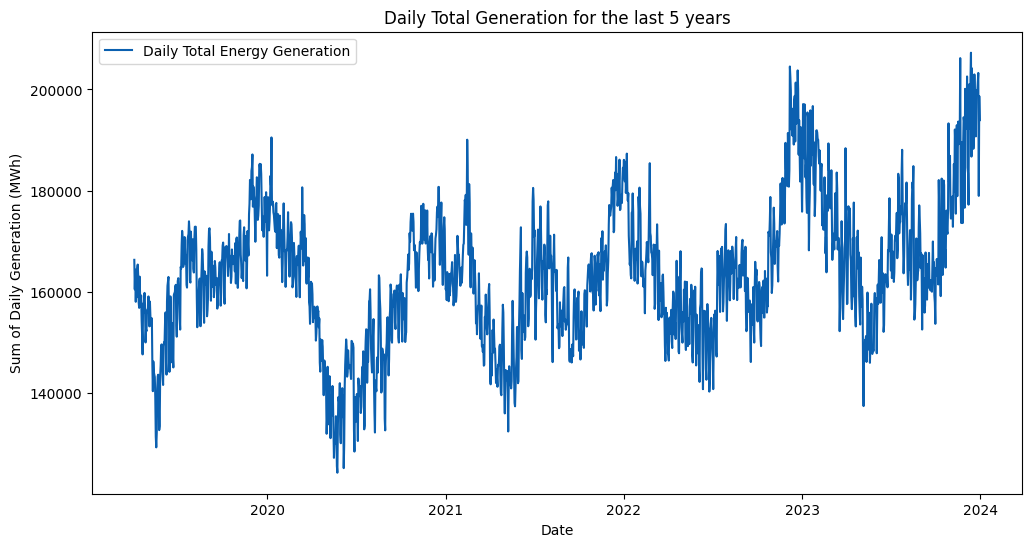

In [49]:
# Trends in energy generation over the last 5 years
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 5 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=5)
df_last_5_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_5_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_5_years.groupby(df_last_5_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_5_years.groupby(generation_df_last_5_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation', color='#0B60B0')

plt.title('Daily Total Generation for the last 5 years')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Generation (MWh)')
plt.legend()
plt.show()

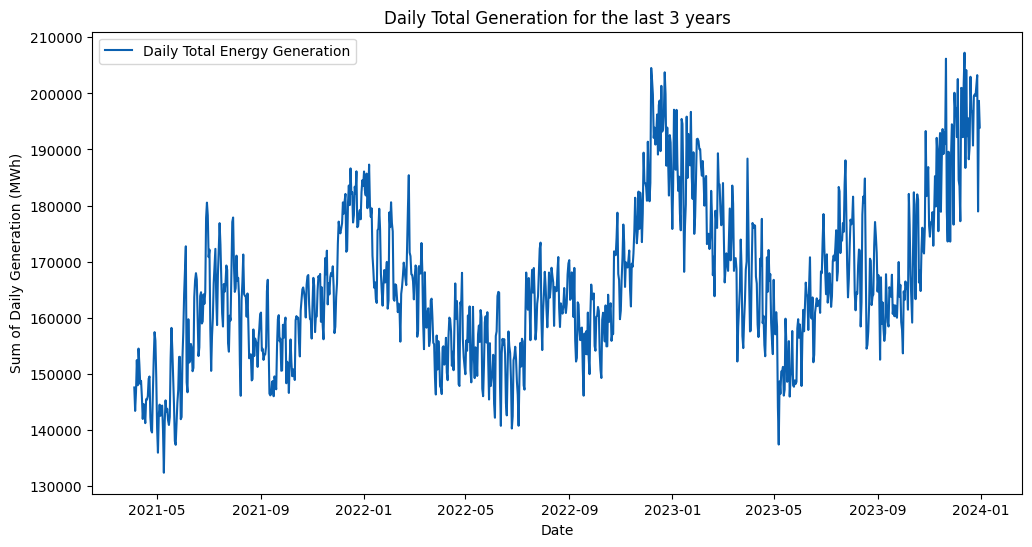

In [52]:
# Trends in energy generation over the last 3 years
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 3 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
df_last_3_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_3_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_3_years.groupby(df_last_3_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_3_years.groupby(generation_df_last_3_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation', color='#0B60B0')

plt.title('Daily Total Generation for the last 3 years')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Generation (MWh)')
plt.legend()
plt.show()# Trends in energy generation over the last 3 years?
import pandas as pd
import matplotlib.pyplot as plt

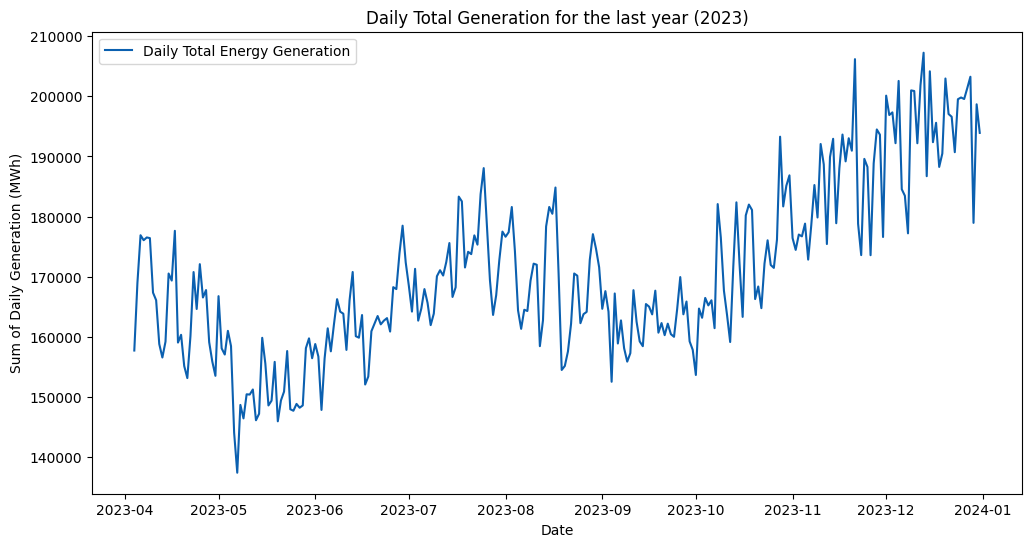

In [54]:
# Trends in energy generation over the last year (2023)
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_1_year = demand_df[demand_df['Date'] >= start_date]
generation_df_last_1_year = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_1_year.groupby(df_last_1_year['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_1_year.groupby(generation_df_last_1_year['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation', color='#0B60B0')

plt.title('Daily Total Generation for the last year (2023)')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Generation (MWh)')
plt.legend()
plt.show()

# Daily System Generation vs. Daily Total Load for last 2 years

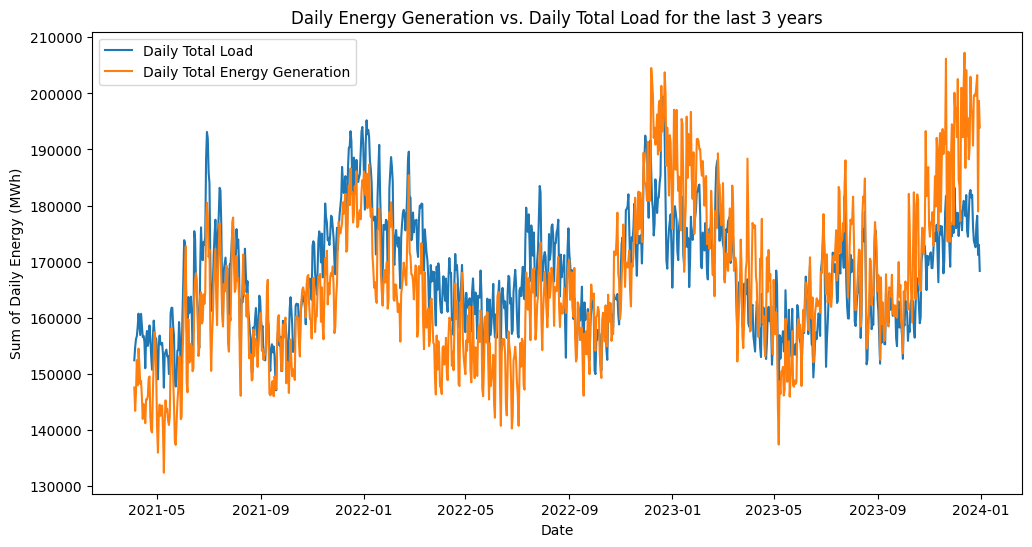

In [56]:
# Putting them together Daily System Generation vs. Daily Total Load for last 3 years
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 3 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
df_last_3_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_3_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_3_years.groupby(df_last_3_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_3_years.groupby(generation_df_last_3_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load')
plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Daily Energy Generation vs. Daily Total Load for the last 3 years')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Energy (MWh)')
plt.legend()
plt.show()

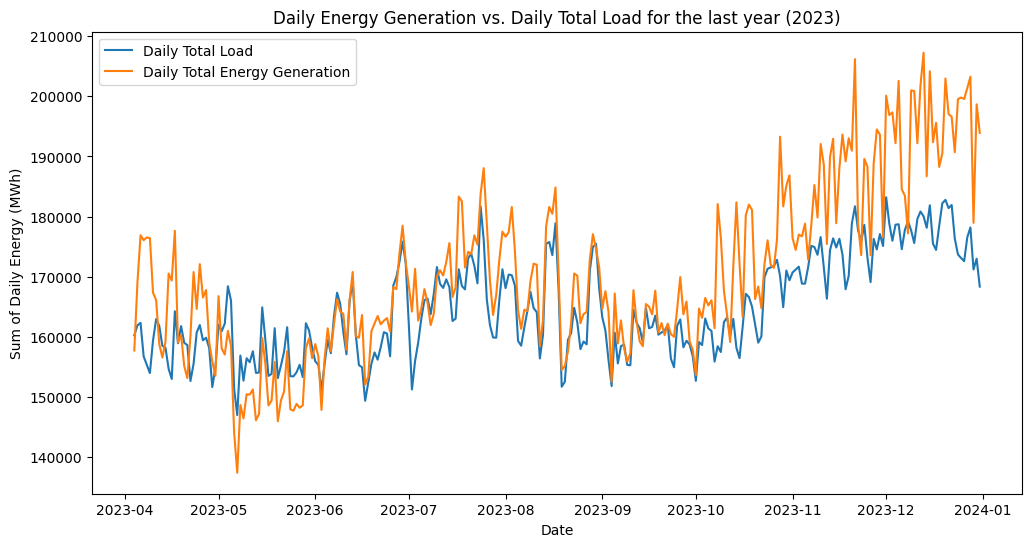

In [58]:
# Putting them together Daily System Generation vs. Daily Total Load for last year 2023
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year 2023
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_1_year = demand_df[demand_df['Date'] >= start_date]
generation_df_last_1_year = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_1_year.groupby(df_last_1_year['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_1_year.groupby(generation_df_last_1_year['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load')
plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Daily Energy Generation vs. Daily Total Load for the last year (2023)')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Energy (MWh)')
plt.legend()
plt.show()

# Monthly Energy Generation vs. Monthly Total Load for 2023

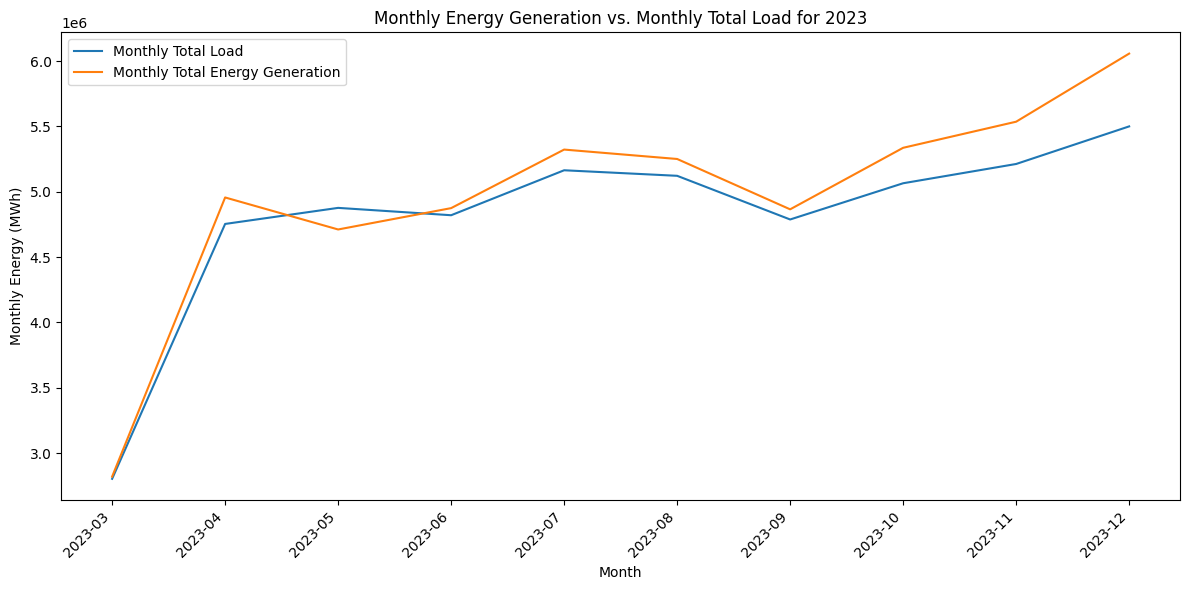

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year, 2023
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_year = demand_df[demand_df['Date'] >= start_date].copy()
generation_df_last_year = generation_df[generation_df['Date'] >= start_date].copy()

# Extract month from the date column
df_last_year['Month'] = df_last_year['Date'].dt.to_period('M').astype(str)
generation_df_last_year['Month'] = generation_df_last_year['Date'].dt.to_period('M').astype(str)

# Calculate monthly total load and monthly total system generation
monthly_total_load = df_last_year.groupby('Month')['Load'].sum().reset_index()
monthly_total_generation = generation_df_last_year.groupby('Month')['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Month' column
merged_df = pd.merge(monthly_total_load, monthly_total_generation, on='Month', how='outer')

# Plot monthly system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Month'], merged_df['Load'], label='Monthly Total Load')
plt.plot(merged_df['Month'], merged_df['System Generation'], label='Monthly Total Energy Generation')

plt.title('Monthly Energy Generation vs. Monthly Total Load for 2023')
plt.xlabel('Month')
plt.ylabel('Monthly Energy (MWh)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# How do weather conditions impact energy consumption?

<Figure size 1800x1000 with 0 Axes>

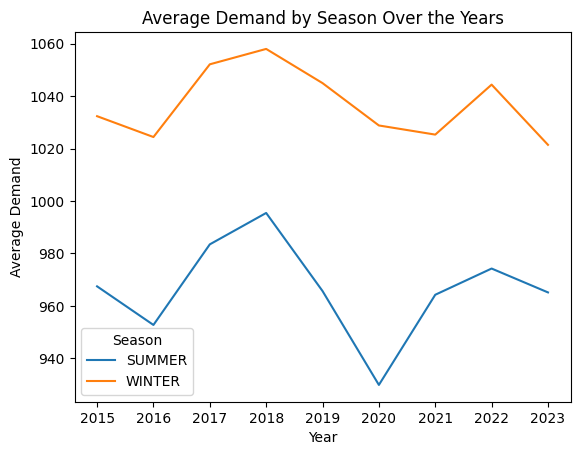

In [60]:
# Average Demand by Season Over the Years'
import pandas as pd
import matplotlib.pyplot as plt


# Group by season and year, and calculate the average demand
seasonal_demand = demand_df.groupby(['Season', demand_df['Date (MST)'].dt.year])['Load'].mean().unstack()

# Plot the demand by season with years on the y-axis and seasons as the legend
plt.figure(figsize=(18, 10))
seasonal_demand.T.plot(linestyle='-')
plt.title('Average Demand by Season Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Demand')
plt.legend(title='Season')
plt.show()

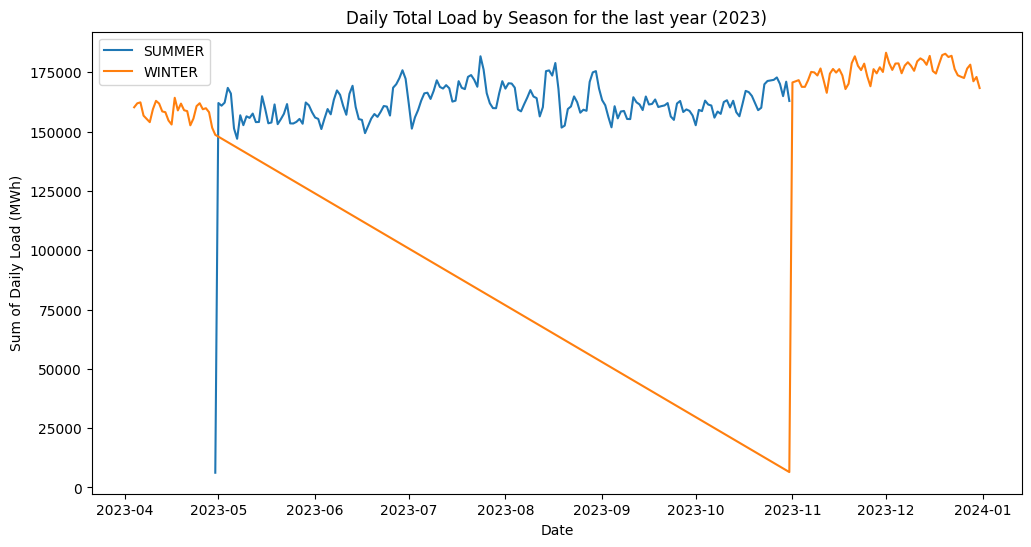

In [65]:
#Average Demand by Season in last year (2023)
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year (2023)
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_1_year = demand_df[demand_df['Date'] >= start_date]

# Calculate daily total load by season
daily_total_load_by_season = df_last_1_year.groupby(['Date', 'Season'])['Load'].sum().reset_index()

# Plot daily total load by season with line graph
plt.figure(figsize=(12, 6))

# Plot each season separately
for season, data in daily_total_load_by_season.groupby('Season'):
    plt.plot(data['Date'], data['Load'], label=season)

plt.title('Daily Total Load by Season for the last year (2023)')
plt.xlabel('Date')
plt.ylabel('Sum of Daily Load (MWh)')
plt.legend()
plt.show()

In [ ]:
# Are there specific regions with notable differences in energy consumption patterns?

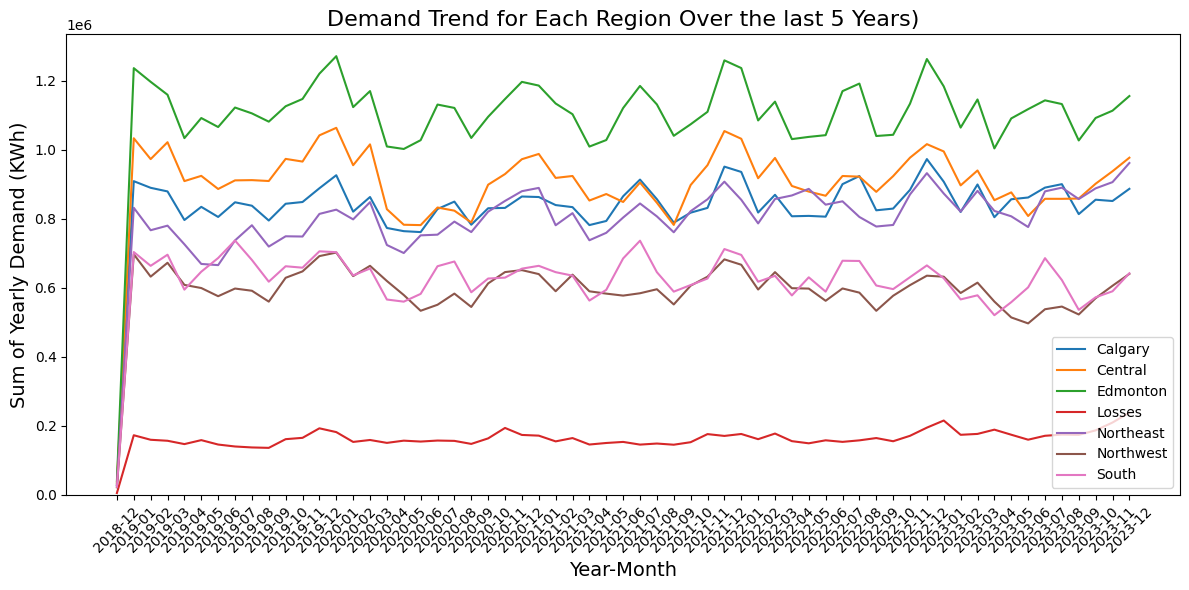

In [67]:
# Demand Trend for Each Region Over the last 5 Years
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

# Filter data for the last 5 years
end_date = demand_df['Date'].max()
start_date = end_date - pd.DateOffset(years=5)
demand_df_last_5_years = demand_df[(demand_df['Date'] >= start_date) & (demand_df['Date'] <= end_date)].copy()

# Extract year and month from the date column using .loc to avoid SettingWithCopyWarning
demand_df_last_5_years.loc[:, 'Year'] = demand_df_last_5_years['Date'].dt.year
demand_df_last_5_years.loc[:, 'Month'] = demand_df_last_5_years['Date'].dt.month

# Group data by region and month to calculate total demand
demand_by_region_month = demand_df_last_5_years.groupby(['Region', 'Year', 'Month'])['Load'].sum().unstack(level=0)

# Convert the index (year, month tuples) to string representation
demand_by_region_month.index = [f'{year}-{month:02d}' for year, month in demand_by_region_month.index]

# Plot demand trend for each region over the months
plt.figure(figsize=(12, 6))
for region in demand_by_region_month.columns:
    plt.plot(demand_by_region_month.index, demand_by_region_month[region], label=region)

plt.title('Demand Trend for Each Region Over the last 5 Years)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sum of Yearly Demand (KWh)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size
plt.yticks(fontsize=10)  # Reduce font size for y-axis labels
plt.legend(fontsize=10)

# Set y-axis limits and increase padding
plt.ylim(bottom=0)  # Set the lower limit to 0
plt.tight_layout()  # Adjust padding for labels

plt.show()

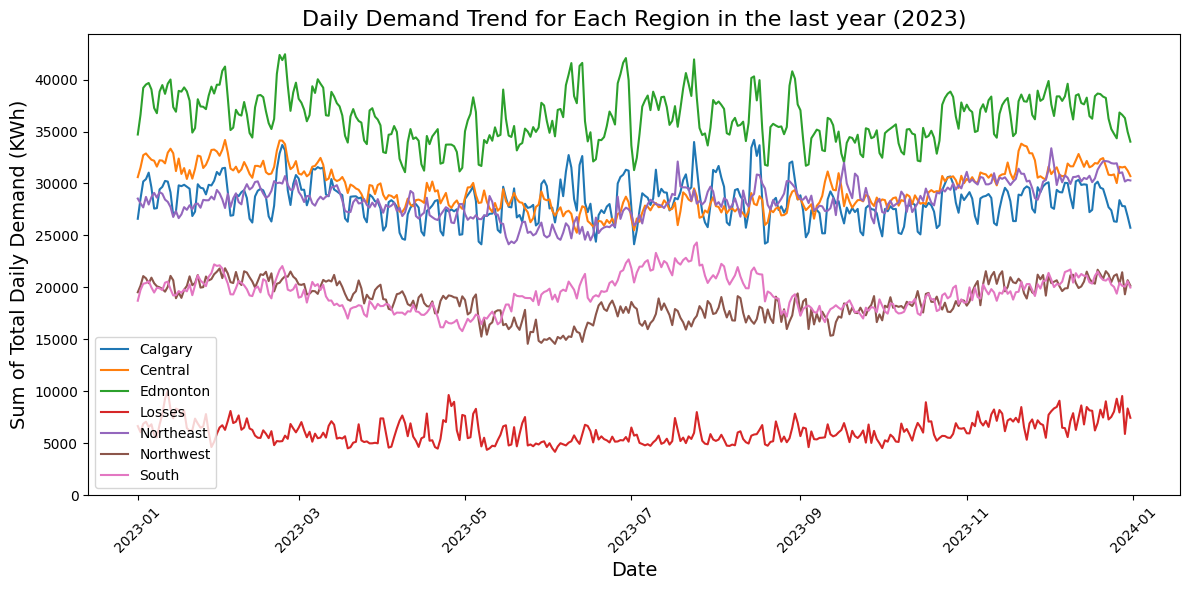

In [70]:
# Daily Demand Trend for Each Region in the last year (2023)
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

# Filter data for the year 2023
demand_df_2023 = demand_df[demand_df['Date'].dt.year == 2023].copy()

# Extract year, month, and day from the date column
demand_df_2023.loc[:, 'Year'] = demand_df_2023['Date'].dt.year
demand_df_2023.loc[:, 'Month'] = demand_df_2023['Date'].dt.month
demand_df_2023.loc[:, 'Day'] = demand_df_2023['Date'].dt.day

# Group data by region and date to calculate total demand
demand_by_region_date = demand_df_2023.groupby(['Region', 'Date'])['Load'].sum().unstack(level=0)

# Plot demand trend for each region over the days in 2023
plt.figure(figsize=(12, 6))
for region in demand_by_region_date.columns:
    plt.plot(demand_by_region_date.index, demand_by_region_date[region], label=region)

plt.title('Daily Demand Trend for Each Region in the last year (2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sum of Total Daily Demand (KWh)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size
plt.yticks(fontsize=10)  # Reduce font size for y-axis labels
plt.legend(fontsize=10)

# Set y-axis limits and increase padding
plt.ylim(bottom=0)  # Set the lower limit to 0
plt.tight_layout()  # Adjust padding for labels

plt.show()

In [ ]:
# What are the peak hours and seasons of energy consumption?

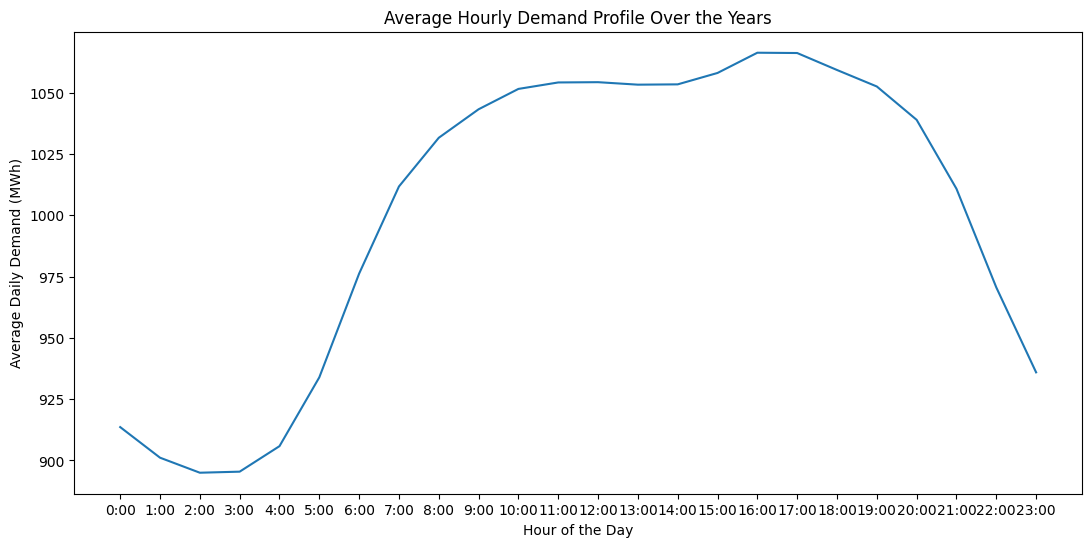

In [78]:
# Demand Hourly Profile Over the Years
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date (MST)' is already a datetime column
demand_df['Hour'] = demand_df['Date (MST)'].dt.hour

# Group by hour of the day and calculate the average demand
hourly_demand_profile = demand_df.groupby('Hour')['Load'].mean()

# Plot the demand hourly profile
plt.figure(figsize=(13,6))
hourly_demand_profile.plot(linestyle='-')
plt.title('Average Hourly Demand Profile Over the Years')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Daily Demand (MWh)')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.show()

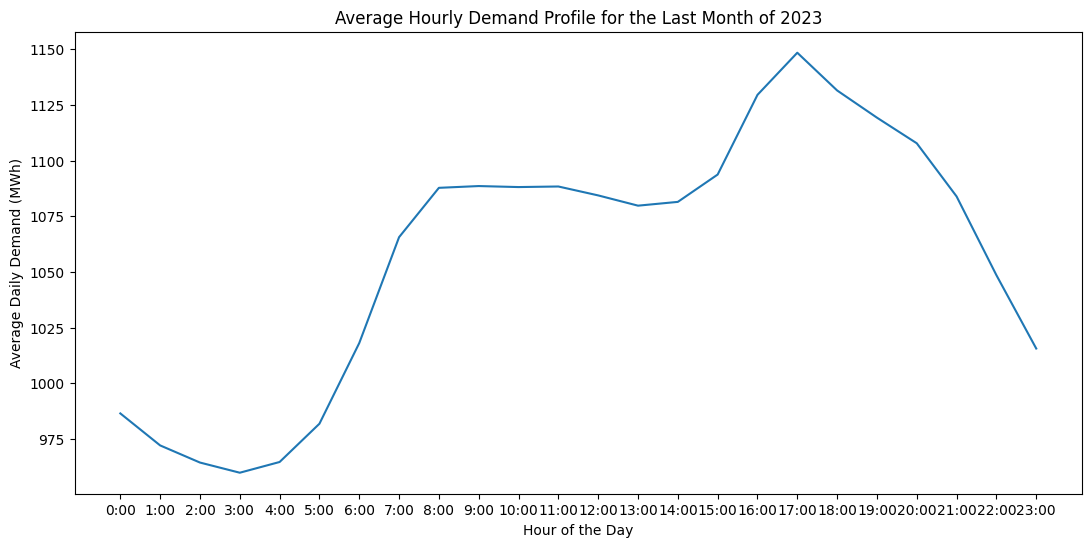

In [77]:
# Demand Hourly Profile Over the last Month of 2023
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last three months of 2023
start_date = pd.Timestamp('2023-12-01')
end_date = pd.Timestamp('2023-12-31')
demand_df_last_3_months = demand_df[(demand_df['Date (MST)'] >= start_date) & (demand_df['Date (MST)'] <= end_date)]

# Explicitly assign hour values using .loc to avoid SettingWithCopyWarning
demand_df_last_3_months.loc[:, 'Hour'] = demand_df_last_3_months['Date (MST)'].dt.hour

# Group by hour of the day and calculate the average demand
hourly_demand_profile_last_3_months = demand_df_last_3_months.groupby('Hour')['Load'].mean()

# Plot the demand hourly profile for the last three months of 2023
plt.figure(figsize=(13, 6))
hourly_demand_profile_last_3_months.plot(linestyle='-')
plt.title('Average Hourly Demand Profile for the Last Month of 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Daily Demand (MWh)')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.show()

In [ ]:
# Can predictive modelling be used to anticipate future energy consumption trends?

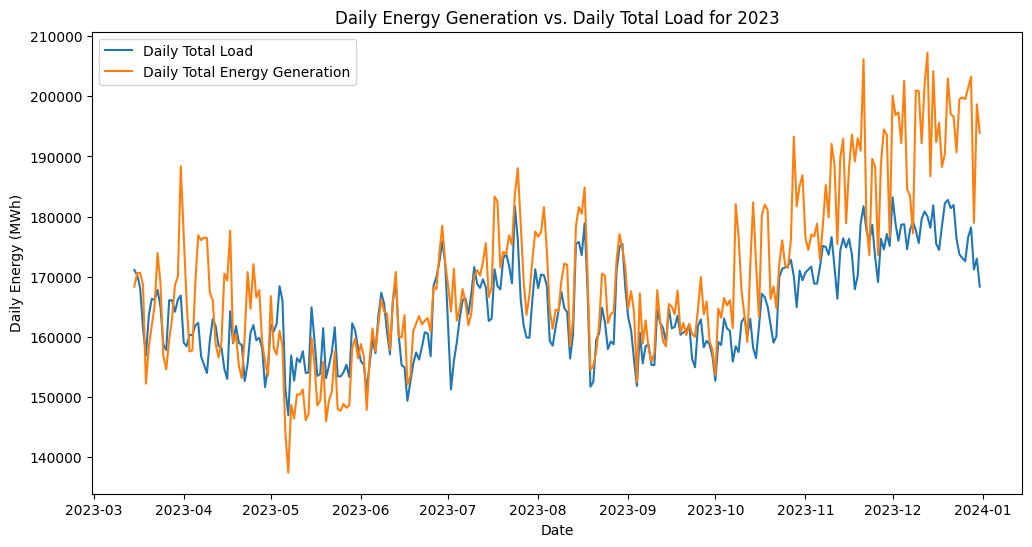

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year, 2023
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
df_last_3_years = demand_df[demand_df['Date'] >= start_date]
generation_df_last_3_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_load = df_last_3_years.groupby(df_last_3_years['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation = generation_df_last_3_years.groupby(generation_df_last_3_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load')
plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Daily Energy Generation vs. Daily Total Load for 2023')
plt.xlabel('Date')
plt.ylabel('Daily Energy (MWh)')
plt.legend()
plt.show()

# Daily Energy Generation vs. Daily Total Load for 2020

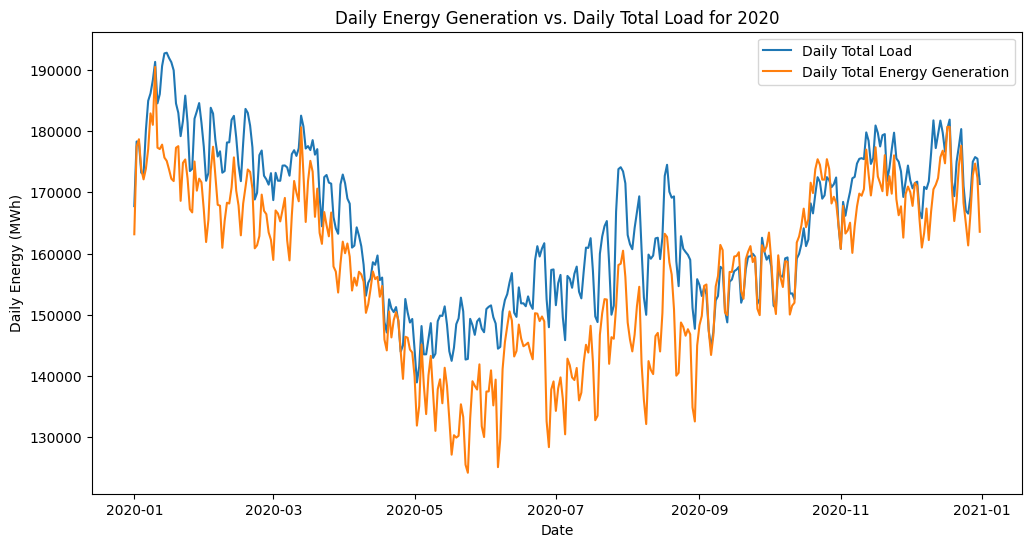

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format with the correct format
demand_df['Date'] = pd.to_datetime(demand_df['Date'], format='%d/%m/%Y')
generation_df['Date'] = pd.to_datetime(generation_df['Date'], format='%d/%m/%Y')

# Filter data for the year 2020
start_date_2020 = pd.to_datetime('2020-01-01')
end_date_2020 = pd.to_datetime('2020-12-31')
df_2020 = demand_df[(demand_df['Date'] >= start_date_2020) & (demand_df['Date'] <= end_date_2020)]
generation_df_2020 = generation_df[(generation_df['Date'] >= start_date_2020) & (generation_df['Date'] <= end_date_2020)]

# Calculate daily total load and daily total system generation for 2020
daily_total_load_2020 = df_2020.groupby(df_2020['Date'].dt.date)['Load'].sum().reset_index()
daily_total_generation_2020 = generation_df_2020.groupby(generation_df_2020['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df_2020 = pd.merge(daily_total_load_2020, daily_total_generation_2020, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph for 2020
plt.figure(figsize=(12, 6))

plt.plot(merged_df_2020['Date'], merged_df_2020['Load'], label='Daily Total Load')
plt.plot(merged_df_2020['Date'], merged_df_2020['System Generation'], label='Daily Total Energy Generation')

plt.title('Daily Energy Generation vs. Daily Total Load for 2020')
plt.xlabel('Date')
plt.ylabel('Daily Energy (MWh)')
plt.legend()
plt.show()

# Monthly Demand Trend for Each Regions Over last 5 Years

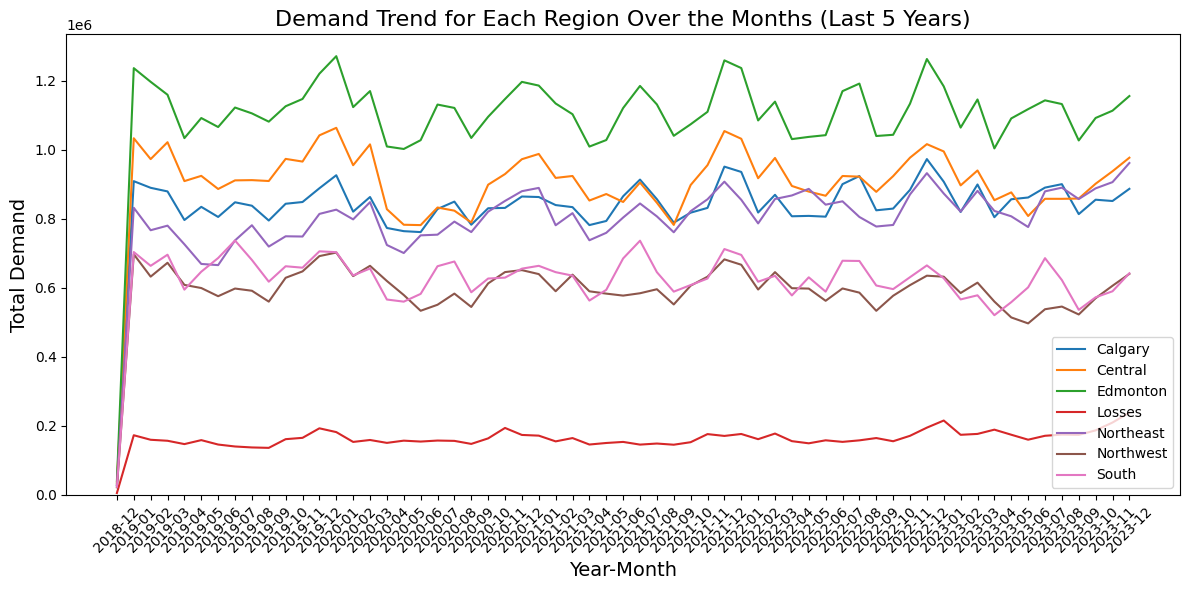

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

# Filter data for the last 5 years
end_date = demand_df['Date'].max()
start_date = end_date - pd.DateOffset(years=5)
demand_df_last_5_years = demand_df[(demand_df['Date'] >= start_date) & (demand_df['Date'] <= end_date)].copy()

# Extract year and month from the date column using .loc to avoid SettingWithCopyWarning
demand_df_last_5_years.loc[:, 'Year'] = demand_df_last_5_years['Date'].dt.year
demand_df_last_5_years.loc[:, 'Month'] = demand_df_last_5_years['Date'].dt.month

# Group data by region and month to calculate total demand
demand_by_region_month = demand_df_last_5_years.groupby(['Region', 'Year', 'Month'])['Load'].sum().unstack(level=0)

# Convert the index (year, month tuples) to string representation
demand_by_region_month.index = [f'{year}-{month:02d}' for year, month in demand_by_region_month.index]

# Plot demand trend for each region over the months
plt.figure(figsize=(12, 6))
for region in demand_by_region_month.columns:
    plt.plot(demand_by_region_month.index, demand_by_region_month[region], label=region)

plt.title('Demand Trend for Each Region Over the Months (Last 5 Years)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Demand', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size
plt.yticks(fontsize=10)  # Reduce font size for y-axis labels
plt.legend(fontsize=10)

# Set y-axis limits and increase padding
plt.ylim(bottom=0)  # Set the lower limit to 0
plt.tight_layout()  # Adjust padding for labels

plt.show()

# Daily Demand Trend for Each Region in 2023

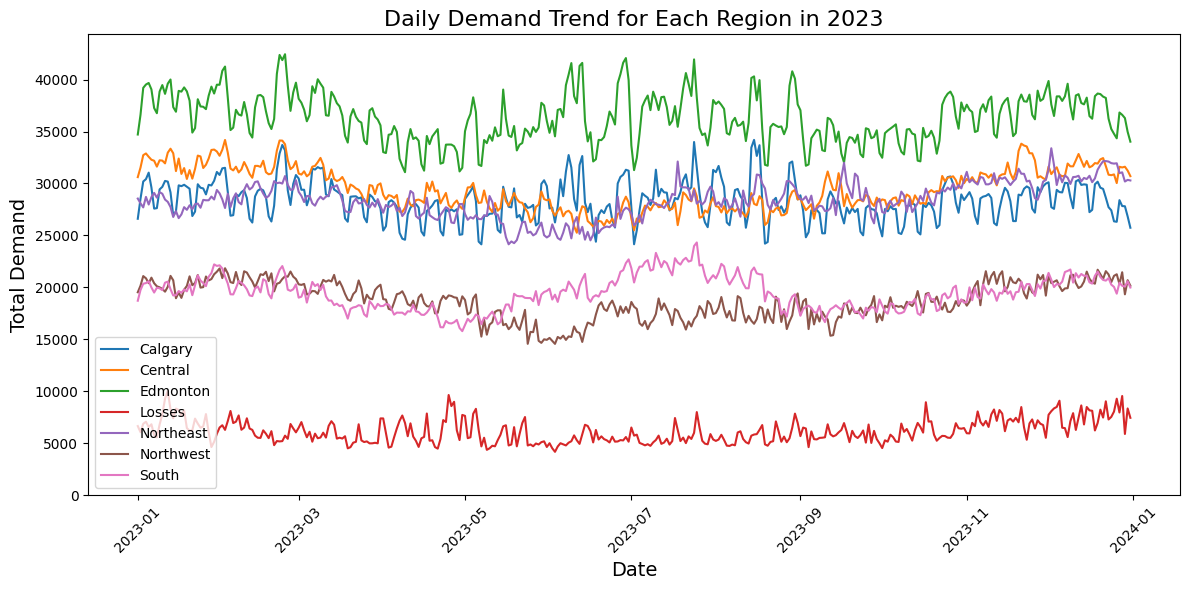

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

# Filter data for the year 2023
demand_df_2023 = demand_df[demand_df['Date'].dt.year == 2023].copy()

# Extract year, month, and day from the date column
demand_df_2023.loc[:, 'Year'] = demand_df_2023['Date'].dt.year
demand_df_2023.loc[:, 'Month'] = demand_df_2023['Date'].dt.month
demand_df_2023.loc[:, 'Day'] = demand_df_2023['Date'].dt.day

# Group data by region and date to calculate total demand
demand_by_region_date = demand_df_2023.groupby(['Region', 'Date'])['Load'].sum().unstack(level=0)

# Plot demand trend for each region over the days in 2023
plt.figure(figsize=(12, 6))
for region in demand_by_region_date.columns:
    plt.plot(demand_by_region_date.index, demand_by_region_date[region], label=region)

plt.title('Daily Demand Trend for Each Region in 2023', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Demand', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size
plt.yticks(fontsize=10)  # Reduce font size for y-axis labels
plt.legend(fontsize=10)

# Set y-axis limits and increase padding
plt.ylim(bottom=0)  # Set the lower limit to 0
plt.tight_layout()  # Adjust padding for labels

plt.show()

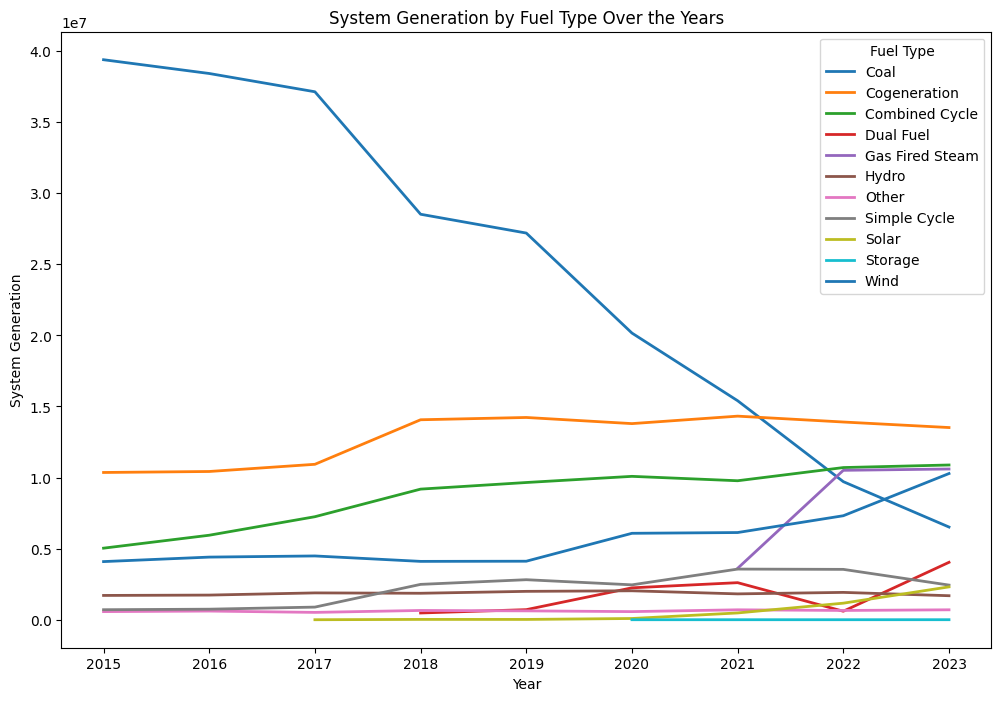

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date (MST)' is already a datetime column
generation_df['Date (MST)'] = pd.to_datetime(generation_df['Date (MST)'], format='%d/%m/%Y %H:%M:%S')

# Extract year from the 'Date (MST)' column
generation_df['Year'] = generation_df['Date (MST)'].dt.year

# Group by 'Year' and 'Fuel Type' and calculate the sum of 'System Generation'
grouped_data = generation_df.groupby(['Year', 'Fuel Type'])['System Generation'].sum().reset_index()

# Pivot the table for better visualization
pivot_data = grouped_data.pivot(index='Year', columns='Fuel Type', values='System Generation')

# Plot the time series without markers and with straight lines
plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    sns.lineplot(data=pivot_data[column], label=column, linewidth=2)
plt.title('System Generation by Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('System Generation')
plt.legend(title='Fuel Type')
plt.show()

# Total Daily Energy Generation for the last 3 years

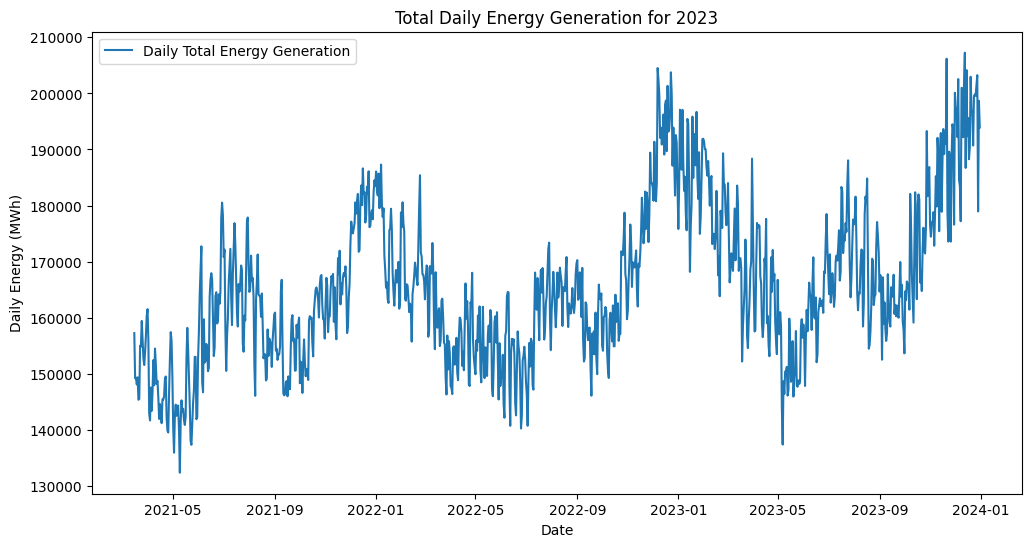

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 3 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
generation_df_last_3_years = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_generation = generation_df_last_3_years.groupby(generation_df_last_3_years['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

#plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load')
plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Total Daily Energy Generation for 2023')
plt.xlabel('Date')
plt.ylabel('Daily Energy (MWh)')
plt.legend()
plt.show()

# Total Daily Energy Generation for 2023

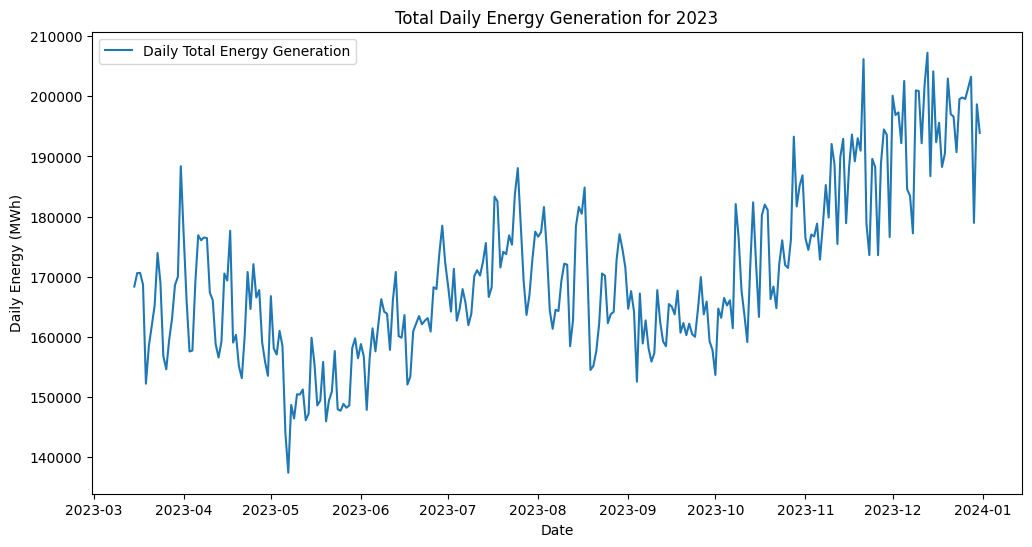

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last year, 2023
start_date = pd.to_datetime('today') - pd.DateOffset(years=1)
generation_df_last_year = generation_df[generation_df['Date'] >= start_date]

# Calculate daily total load and daily total system generation
daily_total_generation = generation_df_last_year.groupby(generation_df_last_year['Date'].dt.date)['System Generation'].sum().reset_index()

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(daily_total_load, daily_total_generation, on='Date', how='outer')

# Plot daily system generation vs. total load with line graph
plt.figure(figsize=(12, 6))

#plt.plot(merged_df['Date'], merged_df['Load'], label='Daily Total Load')
plt.plot(merged_df['Date'], merged_df['System Generation'], label='Daily Total Energy Generation')

plt.title('Total Daily Energy Generation for 2023')
plt.xlabel('Date')
plt.ylabel('Daily Energy (MWh)')
plt.legend()
plt.show()

# Demand Hourly Profile Over the Years

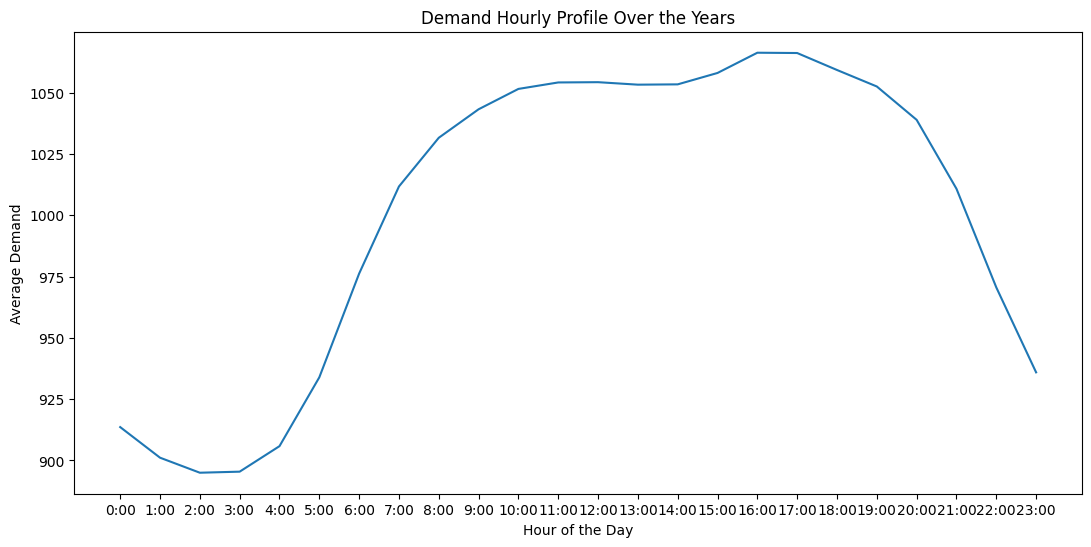

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date (MST)' is already a datetime column
demand_df['Hour'] = demand_df['Date (MST)'].dt.hour

# Group by hour of the day and calculate the average demand
hourly_demand_profile = demand_df.groupby('Hour')['Load'].mean()

# Plot the demand hourly profile
plt.figure(figsize=(13,6))
hourly_demand_profile.plot(linestyle='-')
plt.title('Demand Hourly Profile Over the Years')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.show()

# Demand Hourly Profile for the Last Month of 2023

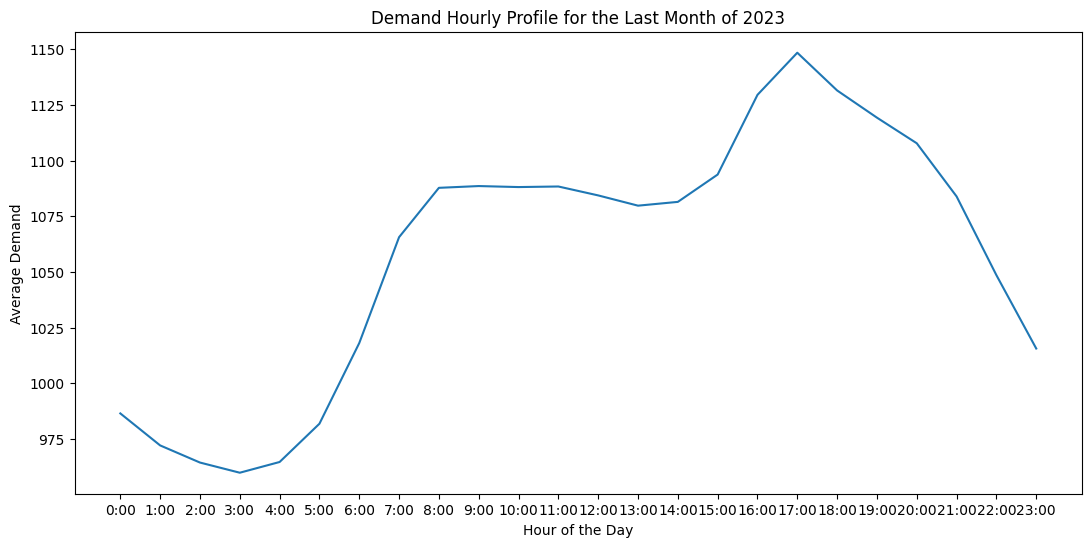

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last three months of 2023
start_date = pd.Timestamp('2023-12-01')
end_date = pd.Timestamp('2023-12-31')
demand_df_last_3_months = demand_df[(demand_df['Date (MST)'] >= start_date) & (demand_df['Date (MST)'] <= end_date)]

# Explicitly assign hour values using .loc to avoid SettingWithCopyWarning
demand_df_last_3_months.loc[:, 'Hour'] = demand_df_last_3_months['Date (MST)'].dt.hour

# Group by hour of the day and calculate the average demand
hourly_demand_profile_last_3_months = demand_df_last_3_months.groupby('Hour')['Load'].mean()

# Plot the demand hourly profile for the last three months of 2023
plt.figure(figsize=(13, 6))
hourly_demand_profile_last_3_months.plot(linestyle='-')
plt.title('Demand Hourly Profile for the Last Month of 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.show()

<Figure size 1300x600 with 0 Axes>

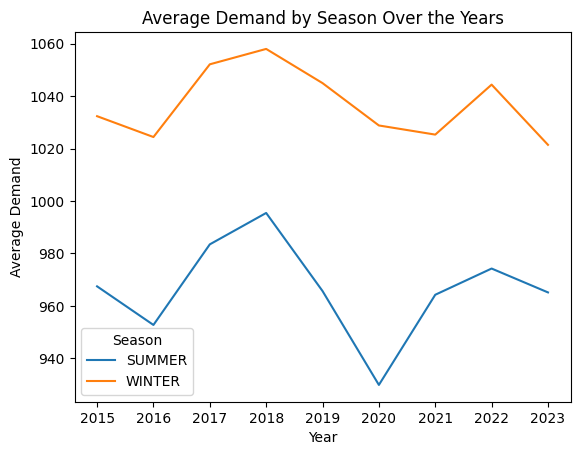

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by season and year, and calculate the average demand
seasonal_demand = demand_df.groupby(['Season', demand_df['Date (MST)'].dt.year])['Load'].mean().unstack()

# Plot the demand by season with years on the y-axis and seasons as the legend
plt.figure(figsize=(13, 6))
seasonal_demand.T.plot(linestyle='-')
plt.title('Average Demand by Season Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Demand')
plt.legend(title='Season')
plt.show()

# Predictive modelling to anticipate future energy consumption trends

In [1]:
# Import the necessary libraries for prediction and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load demand and generation data
demand_df = pd.read_csv("Demand_Data.csv")
generation_df = pd.read_csv("Generation_Data.csv")

In [3]:
# Convert 'Date' column to datetime format with the correct format for both demand and generation data
demand_df['Date'] = pd.to_datetime(demand_df['Date'], format='%d/%m/%Y')
generation_df['Date'] = pd.to_datetime(generation_df['Date'], format='%d/%m/%Y')

In [4]:
# Set 'Date' column as index for both demand and generation data
demand_df.set_index('Date', inplace=True)
generation_df.set_index('Date', inplace=True)
 
# Extract data from 2021 onwards
demand_df = demand_df['2021':]
generation_df = generation_df['2021':]
 
# Resample the data to daily frequency for both demand and generation data
demand_daily = demand_df.resample('D').sum()
generation_daily = generation_df.resample('D').sum()

In [5]:
# Train SARIMAX models for demand and generation data using data up to 2023
model_demand = ARIMA(demand_daily['Load'].loc[:'2023-12-31'], order=(5, 1, 0))
model_generation = ARIMA(generation_daily['System Generation'].loc[:'2023-12-31'],  order=(5, 1, 0))
 
# Fit SARIMAX models
model_fit_demand = model_demand.fit()
model_fit_generation = model_generation.fit()
 
# Forecast demand and generation for 2024 to 2026
forecast_demand = model_fit_demand.predict(steps = 365*3)
forecast_generation = model_fit_generation.predict(steps=365*3)

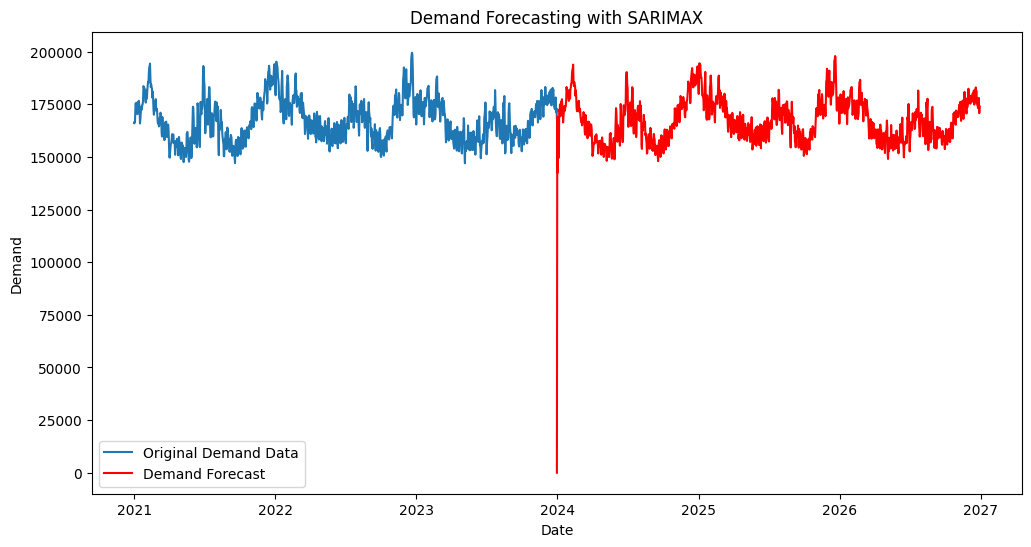

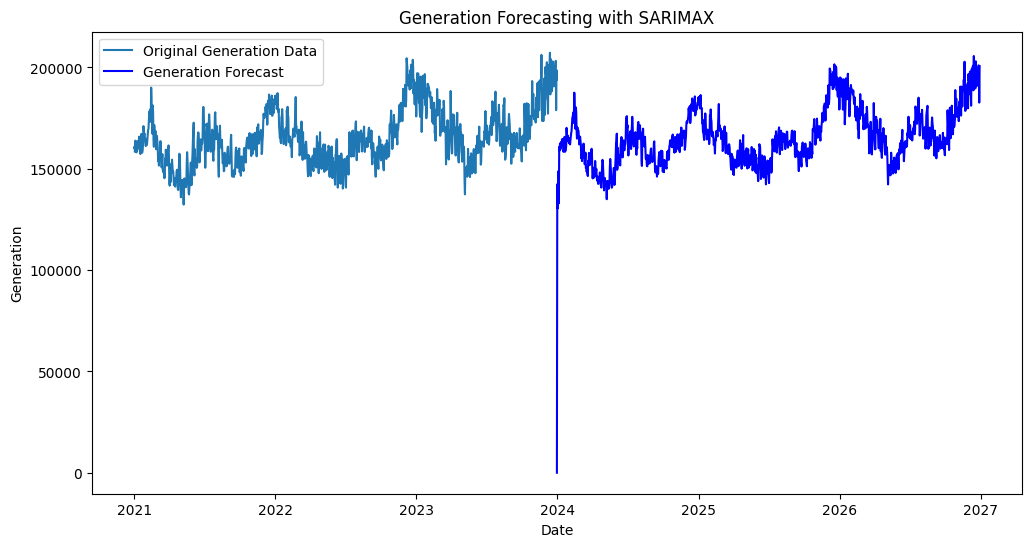

In [6]:
# Plot the original data and forecast for demand
plt.figure(figsize=(12, 6))
plt.plot(demand_daily.index, demand_daily['Load'], label='Original Demand Data')
#plt.plot(forecast_demand.index, forecast_demand, label='Demand Forecast', color='red')
plt.plot(pd.date_range(start=demand_daily.index[-1], periods=365*3), forecast_demand, label='Demand Forecast', color='red')
 
plt.title('Demand Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()
 
# Plot the original data and forecast for generation
plt.figure(figsize=(12, 6))
plt.plot(generation_daily.index, generation_daily['System Generation'], label='Original Generation Data')
plt.plot(pd.date_range(start=demand_daily.index[-1], periods=365*3), forecast_generation, label='Generation Forecast', color='blue')
plt.title('Generation Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Generation')
plt.legend()
plt.show()